## Imports

In [44]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
!pip install category_encoders
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import pickle


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\evios\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Reading CSV

In [2]:
df = pd.read_csv('D:\GIT\classification_project\Projects\Files\Airline_Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Taking log

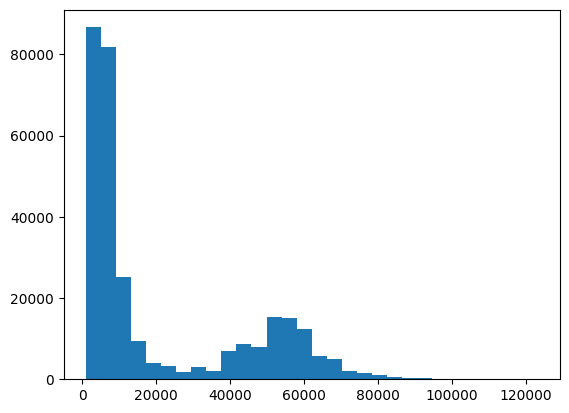

In [3]:
plt.hist(df.price, bins = 30);

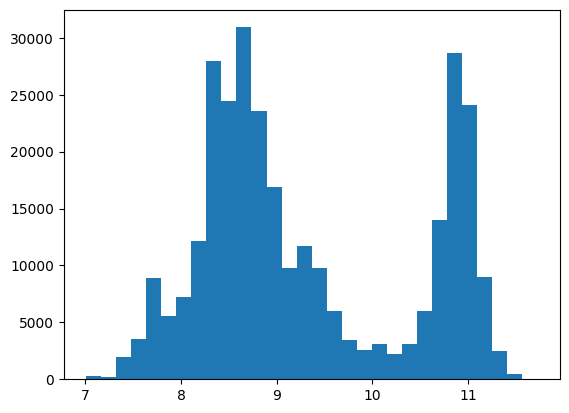

In [4]:
plt.hist(np.log(df.price), bins=30);

In [5]:
# df['log_price'] = np.log(df.price)
# df

## Train Test Split / Data Exploration

In [6]:
y = df[['price']]
x = df.drop(['price', 'Unnamed: 0', 'flight'], axis = 1)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [8]:
x_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
203022,Indigo,Chennai,Morning,one,Evening,Hyderabad,Economy,8.83,7
163529,Vistara,Hyderabad,Afternoon,zero,Afternoon,Mumbai,Economy,1.58,36
212774,Air_India,Delhi,Evening,one,Morning,Bangalore,Business,17.17,12
178754,Indigo,Hyderabad,Afternoon,one,Evening,Chennai,Economy,5.08,30
30767,AirAsia,Delhi,Early_Morning,two_or_more,Afternoon,Hyderabad,Economy,8.42,18
...,...,...,...,...,...,...,...,...,...
21440,Indigo,Delhi,Afternoon,one,Evening,Kolkata,Economy,5.25,9
117583,Vistara,Bangalore,Evening,one,Morning,Chennai,Economy,15.92,26
73349,Indigo,Mumbai,Evening,one,Night,Hyderabad,Economy,5.67,23
267336,Air_India,Kolkata,Evening,one,Afternoon,Bangalore,Business,19.33,2


In [43]:
x_train['days_left'].value_counts()

days_left
39    5013
19    4955
26    4946
31    4928
40    4926
25    4925
18    4923
42    4921
33    4915
20    4908
43    4887
30    4881
17    4874
32    4871
41    4865
13    4857
22    4856
37    4855
24    4855
28    4848
44    4847
36    4845
23    4826
21    4825
34    4814
11    4811
29    4808
38    4803
15    4760
12    4756
27    4740
35    4721
16    4715
14    4709
45    4646
49    4639
46    4610
48    4589
47    4588
10    4399
8     4319
6     4317
7     4303
9     4202
5     4015
4     3817
3     3184
2     3020
1     1477
Name: count, dtype: int64

In [9]:
x_train['source_city'].value_counts()

source_city
Delhi        46031
Mumbai       45563
Bangalore    39054
Kolkata      34832
Hyderabad    30638
Chennai      28996
Name: count, dtype: int64

In [10]:
x_train['stops'].unique()

array(['one', 'zero', 'two_or_more'], dtype=object)

In [11]:
x_train.isna().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64

## Encoding

In [12]:
x_train["stops"] = x_train["stops"].replace({"one": 1, "zero": 0, "two_or_more": 2})
x_test["stops"] = x_test["stops"].replace({"one": 1, "zero": 0, "two_or_more": 2})
x_test

C:\Users\evios\AppData\Local\Temp\ipykernel_20860\697143740.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train["stops"] = x_train["stops"].replace({"one": 1, "zero": 0, "two_or_more": 2})
C:\Users\evios\AppData\Local\Temp\ipykernel_20860\697143740.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_test["stops"] = x_test["stops"].replace({"one": 1, "zero": 0, "two_or_more": 2})


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
135562,Air_India,Kolkata,Night,1,Morning,Mumbai,Economy,13.67,49
95636,Indigo,Bangalore,Afternoon,1,Evening,Mumbai,Economy,6.08,11
65269,AirAsia,Mumbai,Night,1,Early_Morning,Kolkata,Economy,8.25,23
83129,Indigo,Mumbai,Morning,1,Evening,Chennai,Economy,5.08,43
257806,Vistara,Bangalore,Night,1,Morning,Hyderabad,Business,12.50,31
...,...,...,...,...,...,...,...,...,...
138129,Vistara,Kolkata,Morning,2,Night,Bangalore,Economy,12.42,20
81043,Indigo,Mumbai,Evening,1,Night,Chennai,Economy,5.08,28
257050,Vistara,Bangalore,Night,1,Evening,Hyderabad,Business,22.75,19
98125,Indigo,Bangalore,Afternoon,1,Evening,Mumbai,Economy,6.92,24


In [13]:
tar_enc = ce.TargetEncoder()
tar_enc= tar_enc.fit(x_train, y_train.price)
x_train= tar_enc.transform(x_train)
x_test= tar_enc.transform(x_test)

In [45]:
pickle.dump(tar_enc, open('encoder_flight.pickle', 'wb'))

In [14]:
x_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
203022,5317.255987,21956.528797,21689.855935,1,23098.162420,20503.693055,6566.817670,8.83,7
163529,30441.711970,20152.555030,18151.386753,0,18466.536538,21362.242799,6566.817670,1.58,36
212774,23480.169654,18948.970281,21258.108003,1,22260.687293,21602.683483,52524.466162,17.17,12
178754,5317.255987,20152.555030,18151.386753,1,23098.162420,21925.649965,6566.817670,5.08,30
30767,4111.284921,18948.970281,20358.864668,2,18466.536538,20503.693055,6566.817670,8.42,18
...,...,...,...,...,...,...,...,...,...
21440,5317.255987,18948.970281,18151.386753,1,23098.162420,21964.325216,6566.817670,5.25,9
117583,30441.711970,21452.456445,21258.108003,1,22260.687293,21925.649965,6566.817670,15.92,26
73349,5317.255987,21535.422799,21258.108003,1,21589.814025,20503.693055,6566.817670,5.67,23
267336,23480.169654,21798.896015,21258.108003,1,18466.536538,21602.683483,52524.466162,19.33,2


In [15]:
x_train['stops'].value_counts()

stops
1    188258
0     26910
2      9946
Name: count, dtype: int64

In [16]:
import pickle

In [17]:
pickle.dump(tar_enc, open('target_encoder_regression.pickle', 'wb'))

pickle.dump({"one": 1, "zero": 0, "two_or_more": 2}, open("enc_stops_train.pickle", "wb"))


## Scaling

In [18]:
stan_enc = StandardScaler()
x_train_transformed = stan_enc.fit_transform(x_train)
x_test_transformed = stan_enc.transform(x_test)

In [19]:
# scaler_minmax = MinMaxScaler()
# x_train_transformed = scaler_minmax.fit_transform(x_train)
# x_test_transformed = scaler_minmax.transform(x_test)

In [20]:
x_train_transformed

array([[-1.4525966 ,  0.94296239,  0.4748452 , ..., -0.67318853,
        -0.47265389, -1.40061913],
       [ 0.88961903, -0.66551133, -1.64959966, ..., -0.67318853,
        -1.48057025,  0.73653988],
       [ 0.24063251, -1.73866132,  0.21563009, ...,  1.48546797,
         0.68679748, -1.03214344],
       ...,
       [-1.4525966 ,  0.56749244,  0.21563009, ..., -0.67318853,
        -0.9119664 , -0.22149692],
       [ 0.24063251,  0.80241257,  0.21563009, ...,  1.48546797,
         0.98708705, -1.76909482],
       [-1.42212871,  0.80241257, -0.32426238, ..., -0.67318853,
        -0.13621836, -1.47431427]])

In [21]:
x_train_transformed = pd.DataFrame(x_train_transformed, columns= x_train.columns)
x_test_transformed = pd.DataFrame(x_test_transformed, columns= x_test.columns)

## Modeling

In [22]:
from xgboost import XGBRegressor


In [23]:
xgb = XGBRegressor(eval_metric='rmse', n_estimators=1000, early_stopping_rounds=50, learning_rate=.02)
xgb_model = xgb.fit(x_train_transformed, y_train.price, eval_set=[(x_test_transformed, y_test)])

[0]	validation_0-rmse:22249.97761
[1]	validation_0-rmse:21829.68773
[2]	validation_0-rmse:21418.84958
[3]	validation_0-rmse:21016.07631
[4]	validation_0-rmse:20622.43434
[5]	validation_0-rmse:20236.43097
[6]	validation_0-rmse:19858.62080
[7]	validation_0-rmse:19489.36135
[8]	validation_0-rmse:19128.08191
[9]	validation_0-rmse:18773.82371
[10]	validation_0-rmse:18427.22304
[11]	validation_0-rmse:18088.39958
[12]	validation_0-rmse:17757.06089
[13]	validation_0-rmse:17432.26893
[14]	validation_0-rmse:17114.67102
[15]	validation_0-rmse:16803.63879
[16]	validation_0-rmse:16499.28014
[17]	validation_0-rmse:16201.48499
[18]	validation_0-rmse:15910.23784
[19]	validation_0-rmse:15625.16543
[20]	validation_0-rmse:15346.42144
[21]	validation_0-rmse:15073.67419
[22]	validation_0-rmse:14806.99817
[23]	validation_0-rmse:14546.21891
[24]	validation_0-rmse:14291.27227
[25]	validation_0-rmse:14040.99639
[26]	validation_0-rmse:13796.98996
[27]	validation_0-rmse:13558.39000
[28]	validation_0-rmse:13325.4

In [24]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [25]:
pickle.dump(xgb_model, open("XGB_Model_regression_Project.pickle", "wb"))

In [26]:
preds_x_test = xgb_model.predict(x_test_transformed)
preds_x_train = xgb_model.predict(x_train_transformed)

In [27]:
# preds_x_test = np.exp(preds_x_test)
# preds_x_train = np.exp(preds_x_train)

In [28]:
x_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
203022,5317.255987,21956.528797,21689.855935,1,23098.162420,20503.693055,6566.817670,8.83,7
163529,30441.711970,20152.555030,18151.386753,0,18466.536538,21362.242799,6566.817670,1.58,36
212774,23480.169654,18948.970281,21258.108003,1,22260.687293,21602.683483,52524.466162,17.17,12
178754,5317.255987,20152.555030,18151.386753,1,23098.162420,21925.649965,6566.817670,5.08,30
30767,4111.284921,18948.970281,20358.864668,2,18466.536538,20503.693055,6566.817670,8.42,18
...,...,...,...,...,...,...,...,...,...
21440,5317.255987,18948.970281,18151.386753,1,23098.162420,21964.325216,6566.817670,5.25,9
117583,30441.711970,21452.456445,21258.108003,1,22260.687293,21925.649965,6566.817670,15.92,26
73349,5317.255987,21535.422799,21258.108003,1,21589.814025,20503.693055,6566.817670,5.67,23
267336,23480.169654,21798.896015,21258.108003,1,18466.536538,21602.683483,52524.466162,19.33,2


## Root Mean Squared Error / Metrics

In [29]:
y_test

,price
135562,6048
95636,13421
65269,2836
83129,1890
257806,56588
...,...
138129,8111
81043,4809
257050,56588
98125,11263


In [30]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test.price, preds_x_test, squared=False)

C:\Users\evios\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
y_train.shape, preds_x_train.shape


((225114, 1), (225114,))

In [32]:
rmse_train = root_mean_squared_error(y_true = y_train.price, y_pred = preds_x_train)
rmse_test = root_mean_squared_error(y_true = y_test.price, y_pred = preds_x_test)

In [33]:
rmse_train

3736.087252450492

In [34]:
rmse_test

3721.184289210781

In [35]:
rms

3721.184289210781

In [36]:
pickle.dump(rms, open('rms_plane.pickle', 'wb'))